<a href="https://colab.research.google.com/github/jesusgl86/Deep-Learning-Course/blob/main/M3H1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/') 

Mounted at /content/drive/


In [2]:
!ls "/content/drive/My Drive/Colab Notebooks"

 1_PyTorch_Basics.ipynb
 Building_a_Recurrent_Neural_Network_Step_by_Step.ipynb
'Copy of bysection.ipynb'
 Copy_of_GAN_MNIST_Data.ipynb
'Copy of M2H1P2.ipynb'
'Copy of Q3761.ipynb'
'Copy of Untitled14.ipynb'
 M2H3746.ipynb
 M2H857.ipynb
 M3H1.ipynb
 Object_Oriented_Programming_Basics.ipynb
'Session 1 - 8-8-22.ipynb'
 Untitled
 Untitled0.ipynb
'Untitled (1)'
 Untitled10.ipynb
 Untitled11.ipynb
 Untitled12.ipynb
 Untitled1.ipynb
 Untitled2.ipynb
 Untitled3.ipynb
 Untitled4.ipynb
 Untitled5.ipynb
 Untitled6.ipynb
 Untitled7.ipynb
 Untitled8.ipynb
 Untitled9.ipynb
'VAE_DeepLearning (1).ipynb'
'VAE_DeepLearning (3).ipynb'
 VAE_DeepLearning.ipynb


In [3]:
#Python version
import sys
print(sys.version)

#or 
!python --version

3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
Python 3.9.16


In [4]:
import torch; 
#Sets the seed for generating random numbers.
torch.manual_seed(0)

#torch. nn import gives us access to some helpful neural network things, such as various neural network layer types (things like regular fully-connected layers, convolutional layers (for imagery), recurrent layers...etc).
import torch.nn as nn 

#applies Convolution functions
import torch.nn.functional as F

#allow to access pre-loaded datasets as well as your own data
import torch.utils

#contains parameterizable probability distributions and sampling functions
import torch.distributions

#consists of popular datasets, model architectures, and common image transformations for computer vision
import torchvision

import numpy as np
import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 200

#Check GPU Availability
torch.cuda.is_available()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

class Encoder(nn.Module):
    def __init__(self, latent_dims):
        super(Encoder, self).__init__()
        self.linear1 = nn.Linear(784, 512)
        self.linear2 = nn.Linear(512, latent_dims)
    
    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = F.relu(self.linear1(x))
        return self.linear2(x)


class Decoder(nn.Module):
    def __init__(self, latent_dims):
        super(Decoder, self).__init__()
        self.linear1 = nn.Linear(latent_dims, 512)
        self.linear2 = nn.Linear(512, 784)
        
    def forward(self, z):
        z = F.relu(self.linear1(z))
        z = torch.sigmoid(self.linear2(z))
        return z.reshape((-1, 1, 28, 28))

class Autoencoder(nn.Module):
    def __init__(self, latent_dims):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder(latent_dims)
        self.decoder = Decoder(latent_dims)
    
    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z)

#Trainer function We can see that the major change is that it accept now two 
# types of data, the training data and the test data. In which the training data 
#is used to do the optimization step and get the training loss, 
#while the test data just calculates the test loss.
def train(autoencoder, traindata, testdata, epochs=20):
    opt = torch.optim.Adam(autoencoder.parameters())
    TrainLoss=np.zeros(epochs)
    TestLoss=np.zeros(epochs)
    for epoch in range(epochs):
        for x, y in traindata:
            x = x.to(device) # GPU
            opt.zero_grad()
            x_hat = autoencoder(x)
            loss = ((x - x_hat)**2).mean()
            TrainLoss[epoch]=loss
            loss.backward()
            opt.step()
        print(f'Epoch {epoch+1} Training Loss: {loss:.4f}')    
        for x, y in testdata:
            x = x.to(device) # GPU
            opt.zero_grad()
            x_hat = autoencoder(x)
            loss = ((x - x_hat)**2).mean()
            TestLoss[epoch]=loss
        print(f'Epoch {epoch+1} Test Loss: {loss:.4f}')   
    return autoencoder, TrainLoss, TestLoss





cuda


In [5]:

data = torch.utils.data.DataLoader(
        torchvision.datasets.MNIST('./data', 
               transform=torchvision.transforms.ToTensor(), 
               download=True),
        batch_size=128,
        shuffle=True)

print(data)

100%|██████████| 9912422/9912422 [00:00<00:00, 302278675.04it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 41315038.82it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 158839949.39it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20911667.14it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [6]:
print(data)

In [7]:
for batch_size, samples in enumerate(data):
      print(batch_size, samples)



Streaming output truncated to the last 5000 lines.

        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]]), tensor([0, 9, 3, 2, 4, 3, 6, 1, 9, 3, 2, 4, 6, 4, 2, 4, 9, 6, 9, 9, 5, 5, 0, 1,
        0, 2, 8, 1, 9, 6, 4, 1, 9, 0, 6, 1, 0, 4, 5, 6, 2, 9, 5, 4, 5, 0, 3, 9,
        6, 3, 3, 3, 5, 9, 3, 0, 7, 6, 2, 4, 9, 7, 6, 1, 4, 4, 5, 4, 9, 3, 8, 2,
        3, 1, 6, 3, 1, 4, 0, 4, 3, 9, 8, 3, 0, 3, 3, 2, 7, 6, 1, 9, 3, 6, 6, 2,
        2, 5, 2, 8, 8, 2, 3, 3, 1, 4, 9, 0, 9, 2, 4, 4, 5, 9, 0, 9, 1, 9, 6, 8,
      

In [8]:
#The data needed to be separated in order to be used as intended. As such we 
#created the traindata and testdata, with the their respective data loaders 
#which is train\_loader and test\_loader.  We can see that using the function 
#torchvision.datasets.MNIST and specifying in the attribute if it is a training
# set (training=true) will divide the dataset accordingly. 

kwargs = {'num_workers': 1, 'pin_memory': True} if device=='cuda' else {}

traindata=torchvision.datasets.MNIST('/files/', transform=torchvision.transforms.ToTensor(), train=True,  download=True)
train_loader = torch.utils.data.DataLoader(
  traindata,
  batch_size=batch_size, **kwargs)
testdata=torchvision.datasets.MNIST('files/', transform=torchvision.transforms.ToTensor(),  train=False, download=True)
test_loader = torch.utils.data.DataLoader(
  testdata,
  batch_size=batch_size, **kwargs)

100%|██████████| 9912422/9912422 [00:00<00:00, 318195262.89it/s]

Extracting /files/MNIST/raw/train-images-idx3-ubyte.gz to /files/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 38664441.05it/s]


Extracting /files/MNIST/raw/train-labels-idx1-ubyte.gz to /files/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 204897087.57it/s]


Extracting /files/MNIST/raw/t10k-images-idx3-ubyte.gz to /files/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 18732083.35it/s]

Extracting /files/MNIST/raw/t10k-labels-idx1-ubyte.gz to /files/MNIST/raw



100%|██████████| 9912422/9912422 [00:00<00:00, 425575130.71it/s]


Extracting files/MNIST/raw/train-images-idx3-ubyte.gz to files/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 94195718.37it/s]


Extracting files/MNIST/raw/train-labels-idx1-ubyte.gz to files/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 109828353.13it/s]

Extracting files/MNIST/raw/t10k-images-idx3-ubyte.gz to files/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 15400589.14it/s]

Extracting files/MNIST/raw/t10k-labels-idx1-ubyte.gz to files/MNIST/raw



In [9]:
import torchvision.transforms as transforms

In [10]:
transform = transforms.Compose([
    # resize
    transforms.Resize(28),
    # center-crop
    transforms.CenterCrop(32),
    # to-tensor
    transforms.ToTensor(),
    # normalize
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

In [11]:
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=False)

In [12]:
classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')

def imshow(img):
     img = img / 2 + 0.5
     npimg = img.numpy()
     plt.imshow(np.transpose(npimg, (1, 2, 0)))
     plt.show()
    
dataiter = iter(data)
images, labels = next(dataiter)   


In [13]:
images[1]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [14]:
print(type(images))
print(images.shape)
print(torch.min(images[1]))
print(torch.max(images[1]))

<class 'torch.Tensor'>
torch.Size([128, 1, 28, 28])
tensor(0.)
tensor(1.)


In [15]:
labels

tensor([2, 7, 3, 1, 6, 7, 1, 6, 6, 0, 3, 9, 7, 2, 9, 6, 4, 9, 9, 1, 8, 7, 5, 8,
        2, 5, 3, 8, 1, 6, 3, 2, 5, 6, 1, 0, 4, 1, 2, 4, 7, 0, 1, 6, 7, 8, 3, 2,
        8, 9, 2, 9, 3, 1, 4, 0, 6, 3, 0, 6, 3, 8, 1, 1, 8, 3, 1, 5, 1, 8, 1, 4,
        7, 9, 2, 5, 5, 5, 0, 0, 0, 2, 7, 3, 1, 9, 1, 9, 2, 9, 4, 9, 7, 0, 1, 2,
        0, 3, 7, 9, 3, 0, 8, 1, 8, 4, 9, 7, 8, 4, 9, 7, 3, 0, 1, 1, 7, 8, 1, 2,
        7, 2, 6, 8, 2, 4, 2, 0])

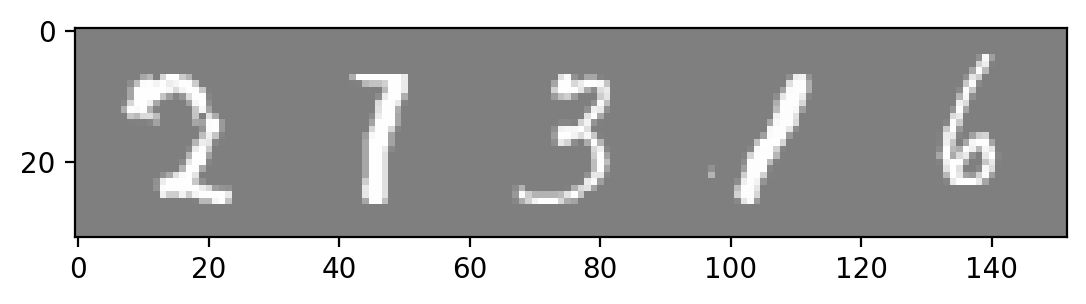

    2     7     3     1     6


In [16]:

imshow(torchvision.utils.make_grid(images[0:5]))

print(' '.join('%5s' % classes[labels[j]] for j in range(5)))

In [17]:
latent_dims = 2
autoencoder = Autoencoder(latent_dims).to(device) # GPU

[autoencoder, trainloss, testloss] = train(autoencoder, train_loader, test_loader)

Epoch 1 Training Loss: 0.0580
Epoch 1 Test Loss: 0.0525
Epoch 2 Training Loss: 0.0542
Epoch 2 Test Loss: 0.0482
Epoch 3 Training Loss: 0.0522
Epoch 3 Test Loss: 0.0465
Epoch 4 Training Loss: 0.0505
Epoch 4 Test Loss: 0.0451
Epoch 5 Training Loss: 0.0489
Epoch 5 Test Loss: 0.0442
Epoch 6 Training Loss: 0.0479
Epoch 6 Test Loss: 0.0434
Epoch 7 Training Loss: 0.0473
Epoch 7 Test Loss: 0.0427
Epoch 8 Training Loss: 0.0467
Epoch 8 Test Loss: 0.0422
Epoch 9 Training Loss: 0.0461
Epoch 9 Test Loss: 0.0418
Epoch 10 Training Loss: 0.0458
Epoch 10 Test Loss: 0.0416
Epoch 11 Training Loss: 0.0453
Epoch 11 Test Loss: 0.0414
Epoch 12 Training Loss: 0.0449
Epoch 12 Test Loss: 0.0412
Epoch 13 Training Loss: 0.0445
Epoch 13 Test Loss: 0.0411
Epoch 14 Training Loss: 0.0441
Epoch 14 Test Loss: 0.0409
Epoch 15 Training Loss: 0.0436
Epoch 15 Test Loss: 0.0408
Epoch 16 Training Loss: 0.0432
Epoch 16 Test Loss: 0.0407
Epoch 17 Training Loss: 0.0428
Epoch 17 Test Loss: 0.0406
Epoch 18 Training Loss: 0.0423
E

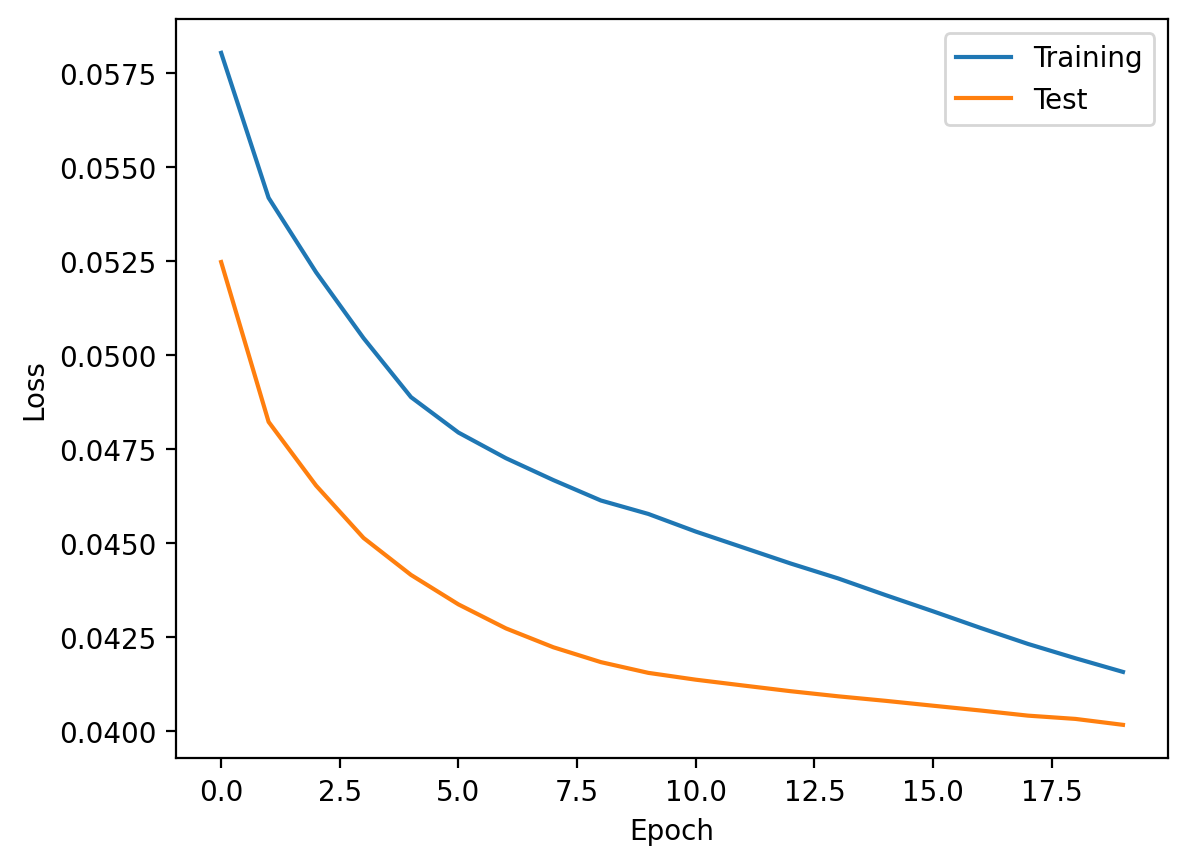

In [18]:

import matplotlib.pyplot as plt
plt.plot(range(20),trainloss)
plt.plot(range(20),testloss)
plt.gca().legend(('Training','Test'))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [19]:
def plot_latent(autoencoder, data, num_batches=100):
    for i, (x, y) in enumerate(data):
        z = autoencoder.encoder(x.to(device))
        z = z.to('cpu').detach().numpy()
        plt.scatter(z[:, 0], z[:, 1], c=y, cmap='tab10')
        if i > num_batches:
            plt.colorbar()
            break

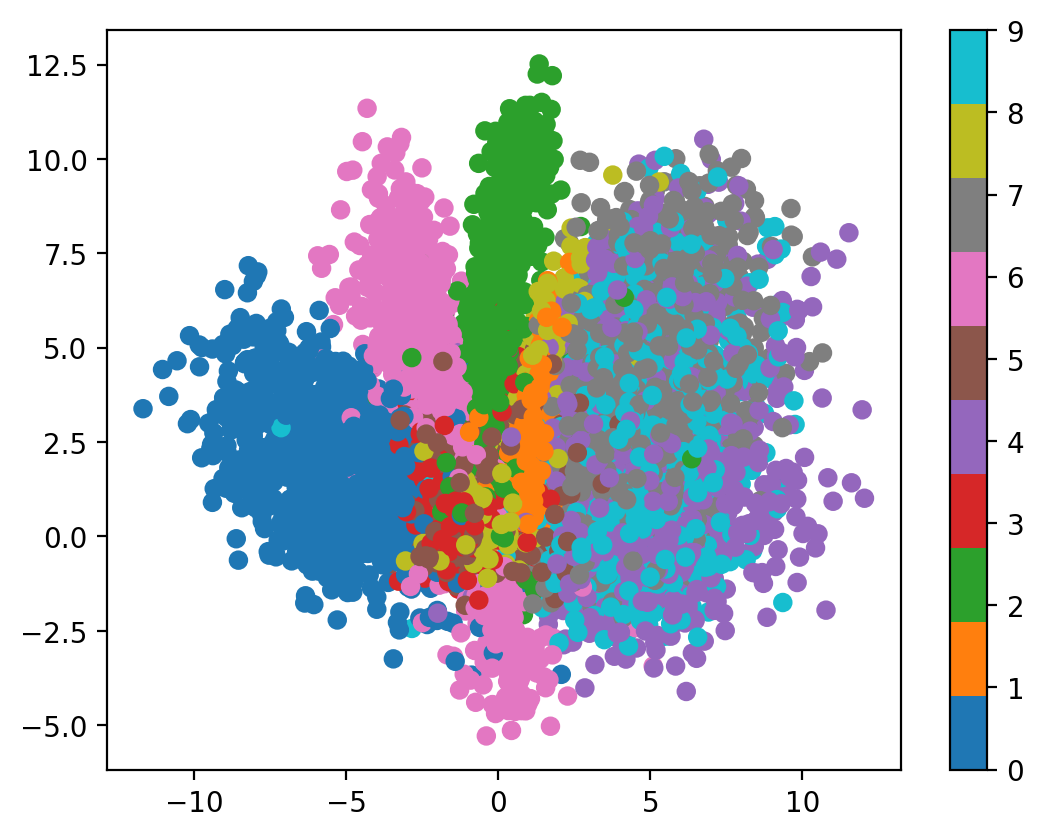

In [20]:
plot_latent(autoencoder, data)

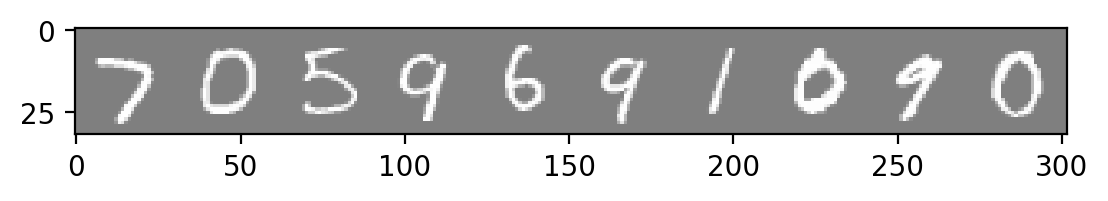

    7     0     5     9     6     9     1     0     9     0


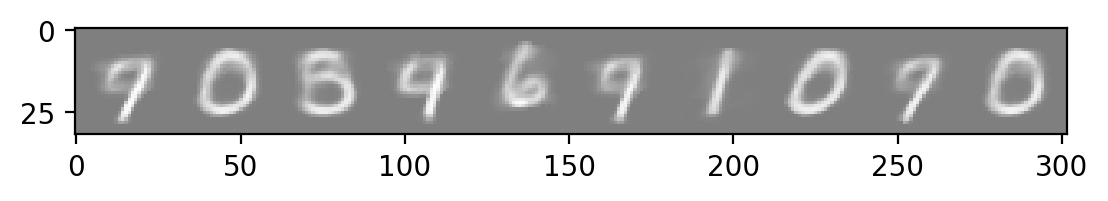

In [21]:
#We first import the library random, then use iter to iterate through the test 
#dataloader in order to obtain the testimages and testlabels. In particular
#we only need the testlabels since we already obtained the test images before 
#with testdata, as such testimages is redundant and not used. We use torch.stack
#to make tensor of images stacked together in order to use imshowto show the 
#images. Inside the for loop we directly input the images to the autoencoder to 
#getthe x_hat. We reshape, make it a tensor and save it in decoded images. 
#At the end we use imshow to visualize the output of the images.


import random as rand
testdataiter = iter(test_loader)
testimages, testlabels = next(testdataiter) 
idx = rand.sample(range(len(test_loader)), 10)
img=torch.stack([testdata[i][0] for i in idx])
imshow(torchvision.utils.make_grid(img,nrow=10))
print(' '.join('%5s' % classes[testlabels[idx[j]]] for j in range(10)))
i=0;
decoded_images= torch.zeros((10,1,28,28), dtype=torch.float64)
for z in img:
   z=z.to(device)
   x_hat = autoencoder(z)
   x_hat = x_hat.reshape(28, 28).to('cpu').detach().numpy()
   decoded_images[i][0]=torch.Tensor(x_hat) 
   i+=1 
imshow(torchvision.utils.make_grid(decoded_images,nrow=10)) 